#### Imports

In [1]:
import pandas as pd
import sklearn
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import roc_curve, RocCurveDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
from sklearn.metrics import f1_score
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('max_columns',None)

In [2]:
data = pd.read_csv('/Users/dylanhayashi/Desktop/MSDS 422 - Practical Machine Learning/Module 4/data-2.csv')

#### Target Variable: Bankrupt

In [3]:
# Describe
y_train = data.loc[:,'Bankrupt?']
round(y_train.describe(),3)

count    6819.000
mean        0.032
std         0.177
min         0.000
25%         0.000
50%         0.000
75%         0.000
max         1.000
Name: Bankrupt?, dtype: float64

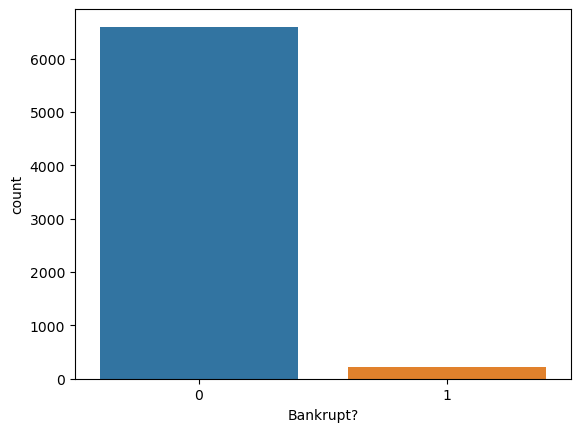

In [4]:
#S4 EDA Frequency Plot of Target variable
sns_plot =sns.countplot(x = y_train)
plt.show()

In [5]:
print(f'Bankrupt has a skew of {round(y_train.skew(),3)}')

Bankrupt has a skew of 5.295


#### Independent Variables

In [6]:
x_train = data.loc[:,data.columns[1:]]

In [7]:
# Describe
variable_descriptions = x_train.describe(percentiles=[.05, .25, .75, .95],include='all')
variable_descriptions_two = x_train.isna().sum().to_frame(name = 'missing').T
summary = pd.concat([variable_descriptions, variable_descriptions_two])
print('There are no missing values in this dataset.\nAll of the variables are scaled.')
display(round(summary,3))

There are no missing values in this dataset.
All of the variables are scaled.


,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000,6819.000,6819.000,6819.000,6819.000,6819.000,6819.000,6819.000,6819.000,6819.000,6.819000e+03,6.819000e+03,6819.000,6.819000e+03,6819.000,6819.000,6819.000,6819.000,6819.000,6819.000,6.819000e+03,6819.000,6819.000,6819.000,6819.000,6819.000,6819.000,6819.000,6.819000e+03,6.819000e+03,6819.000,6819.000,6.819000e+03,6.819000e+03,6819.000,6.819000e+03,6819.000,6819.000,6819.000,6819.000,6819.000,6819.000,6819.000,6819.000,6819.000,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6819.000,6.819000e+03,6819.000,6.819000e+03,6819.000,6819.000,6819.000,6819.000,6.819000e+03,6.819000e+03,6819.000,6819.000,6819.000,6.819000e+03,6819.000,6819.000,6819.000,6.819000e+03,6819.000,6819.000,6819.000,6.819000e+03,6.819000e+03,6819.000,6.819000e+03,6819.000,6.819000e+03,6819.000,6819.000,6819.000,6819.000,6819.000,6819.000,6819.000,6819.000,6819.000,6819.000,6.819000e+03,6819.000,6819.000,6819.000,6819.000,6819.000,6819.000,6819.0,6819.000
mean,0.505,0.559,0.554,0.608,0.608,0.999,0.797,0.809,0.304,0.781,1.995347e+09,1.950427e+09,0.467,1.644801e+07,0.115,0.191,0.191,0.191,0.229,0.323,1.328641e+06,0.109,0.184,0.022,0.848,0.689,0.689,0.218,5.508097e+09,1.566212e+06,0.264,0.380,4.032850e+05,8.376595e+06,0.631,4.416337e+06,0.113,0.887,0.009,0.375,0.006,0.109,0.183,0.402,0.142,1.278971e+07,9.826221e+06,2.149106e+09,1.008596e+0

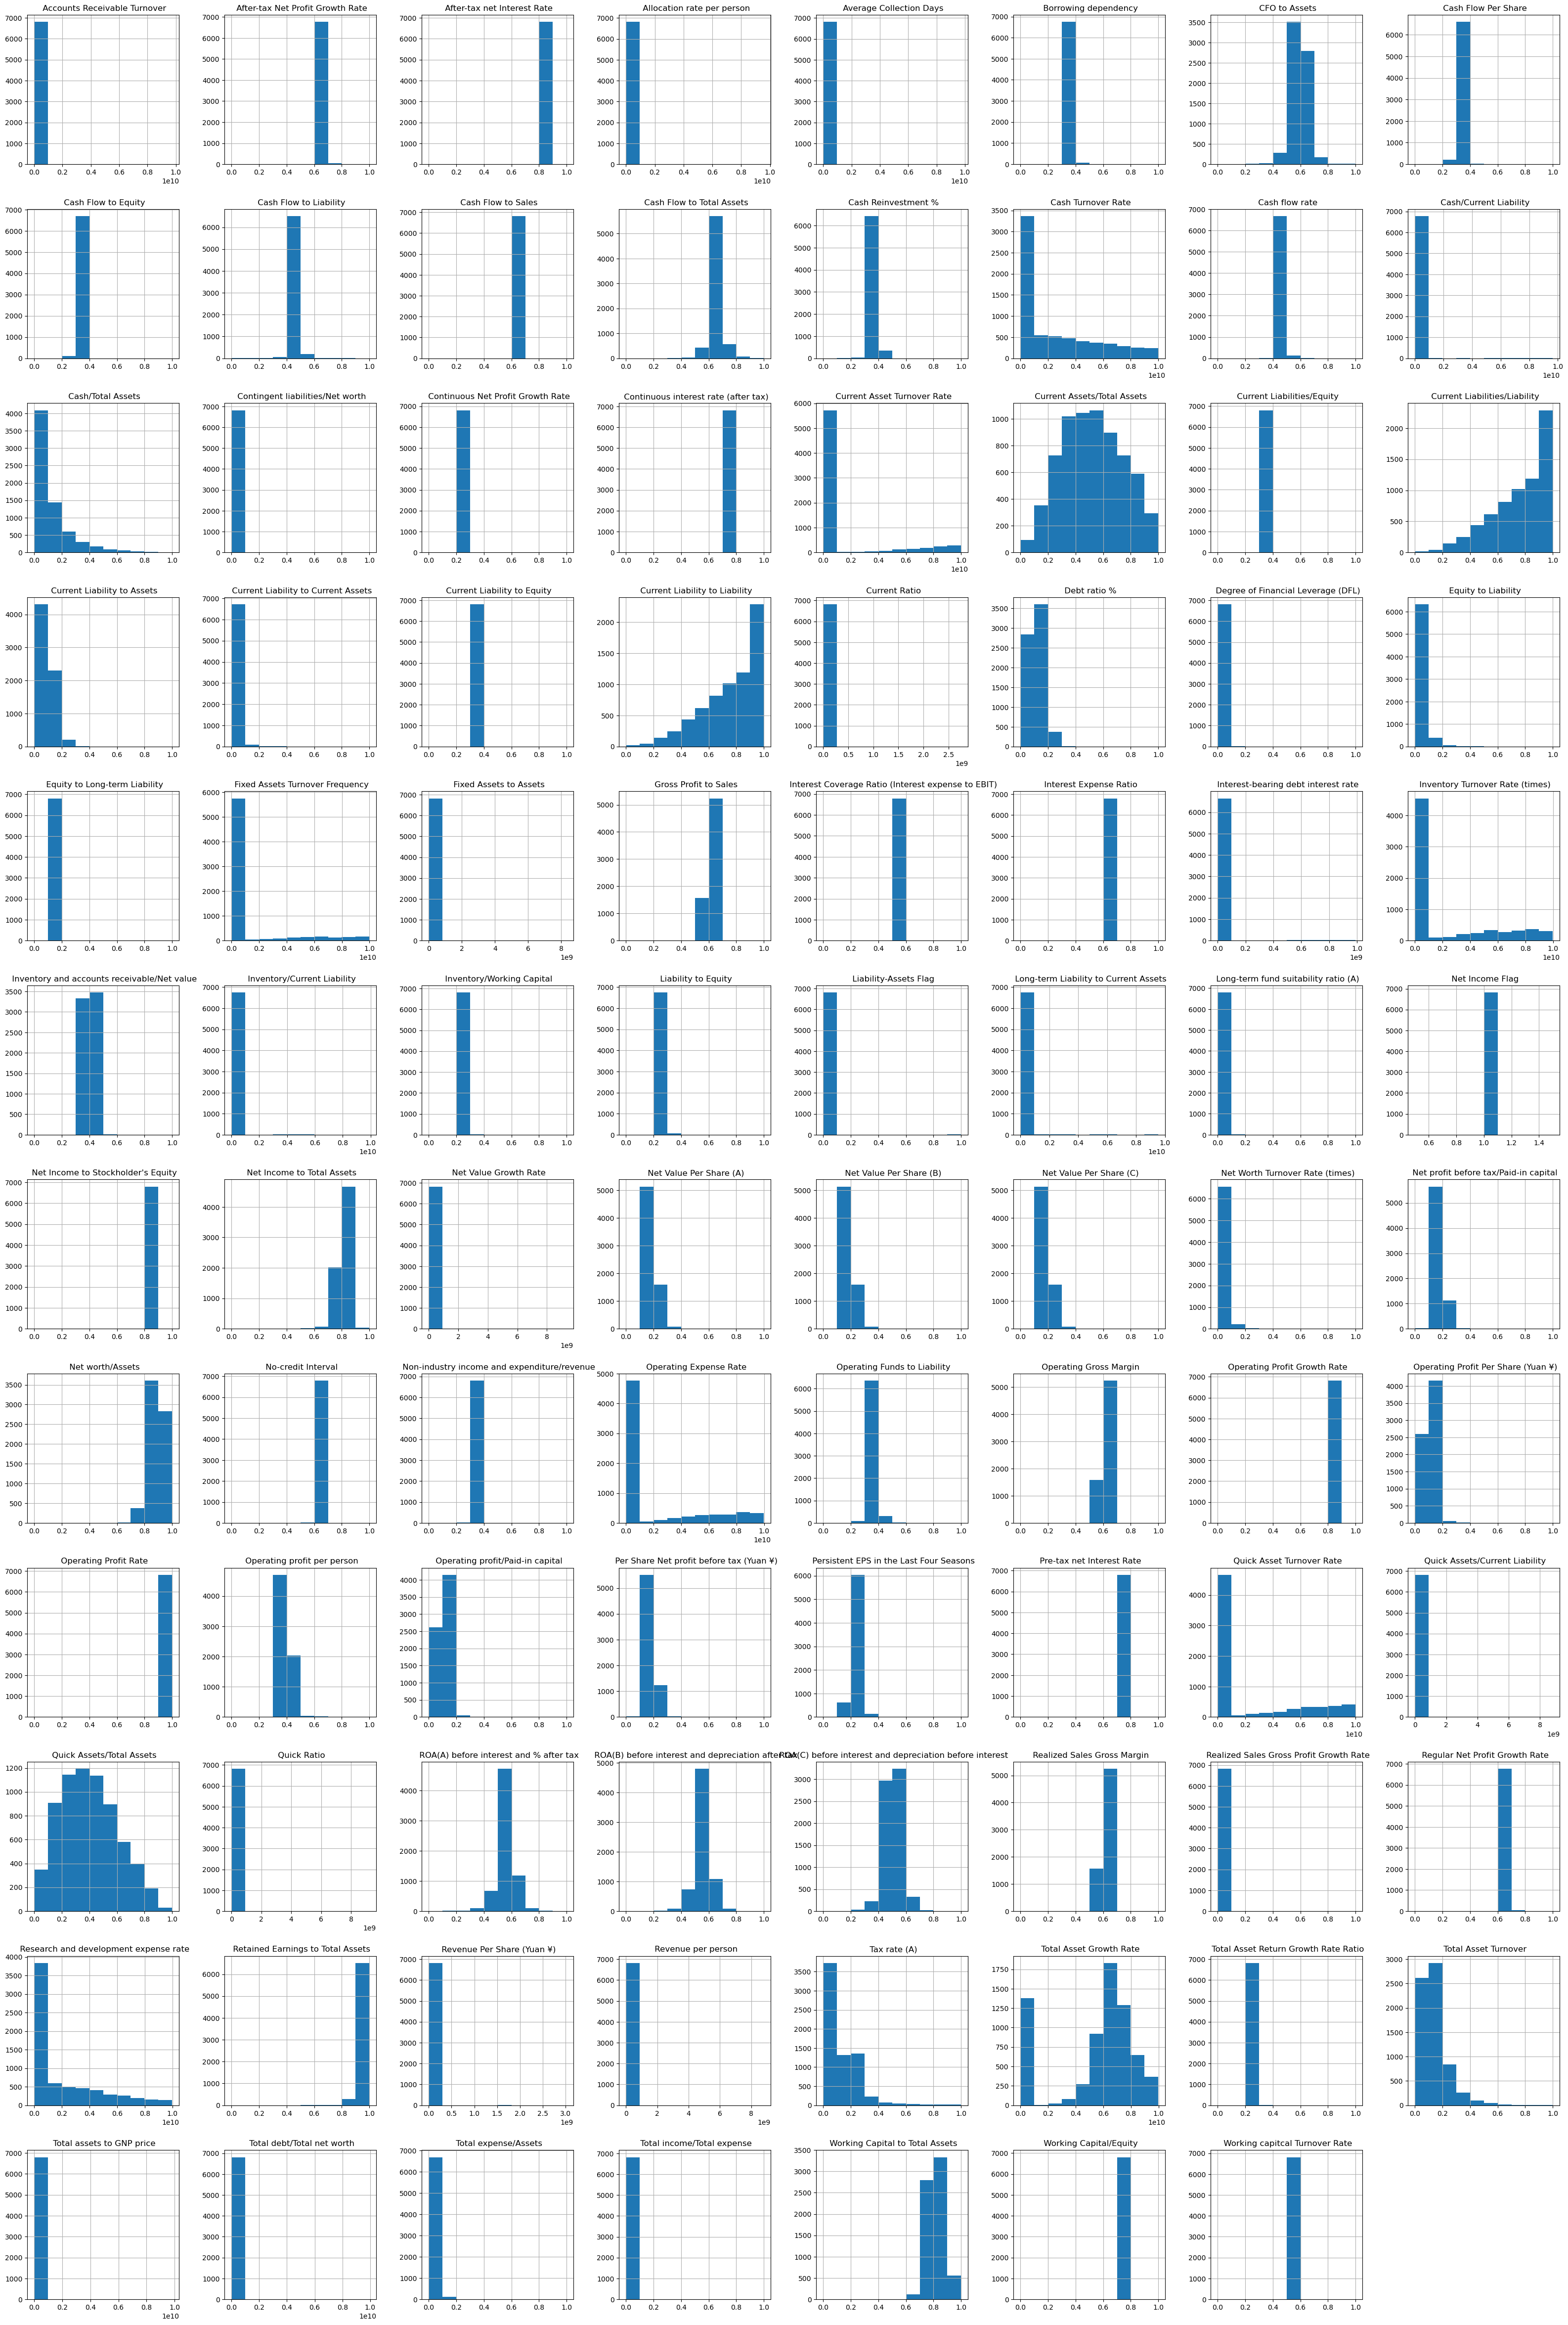

In [8]:
# Distributions
x_train.hist(figsize=(40,60), layout=(12,8))
plt.show()

<Figure size 4000x4000 with 0 Axes>

<Figure size 4000x4000 with 0 Axes>

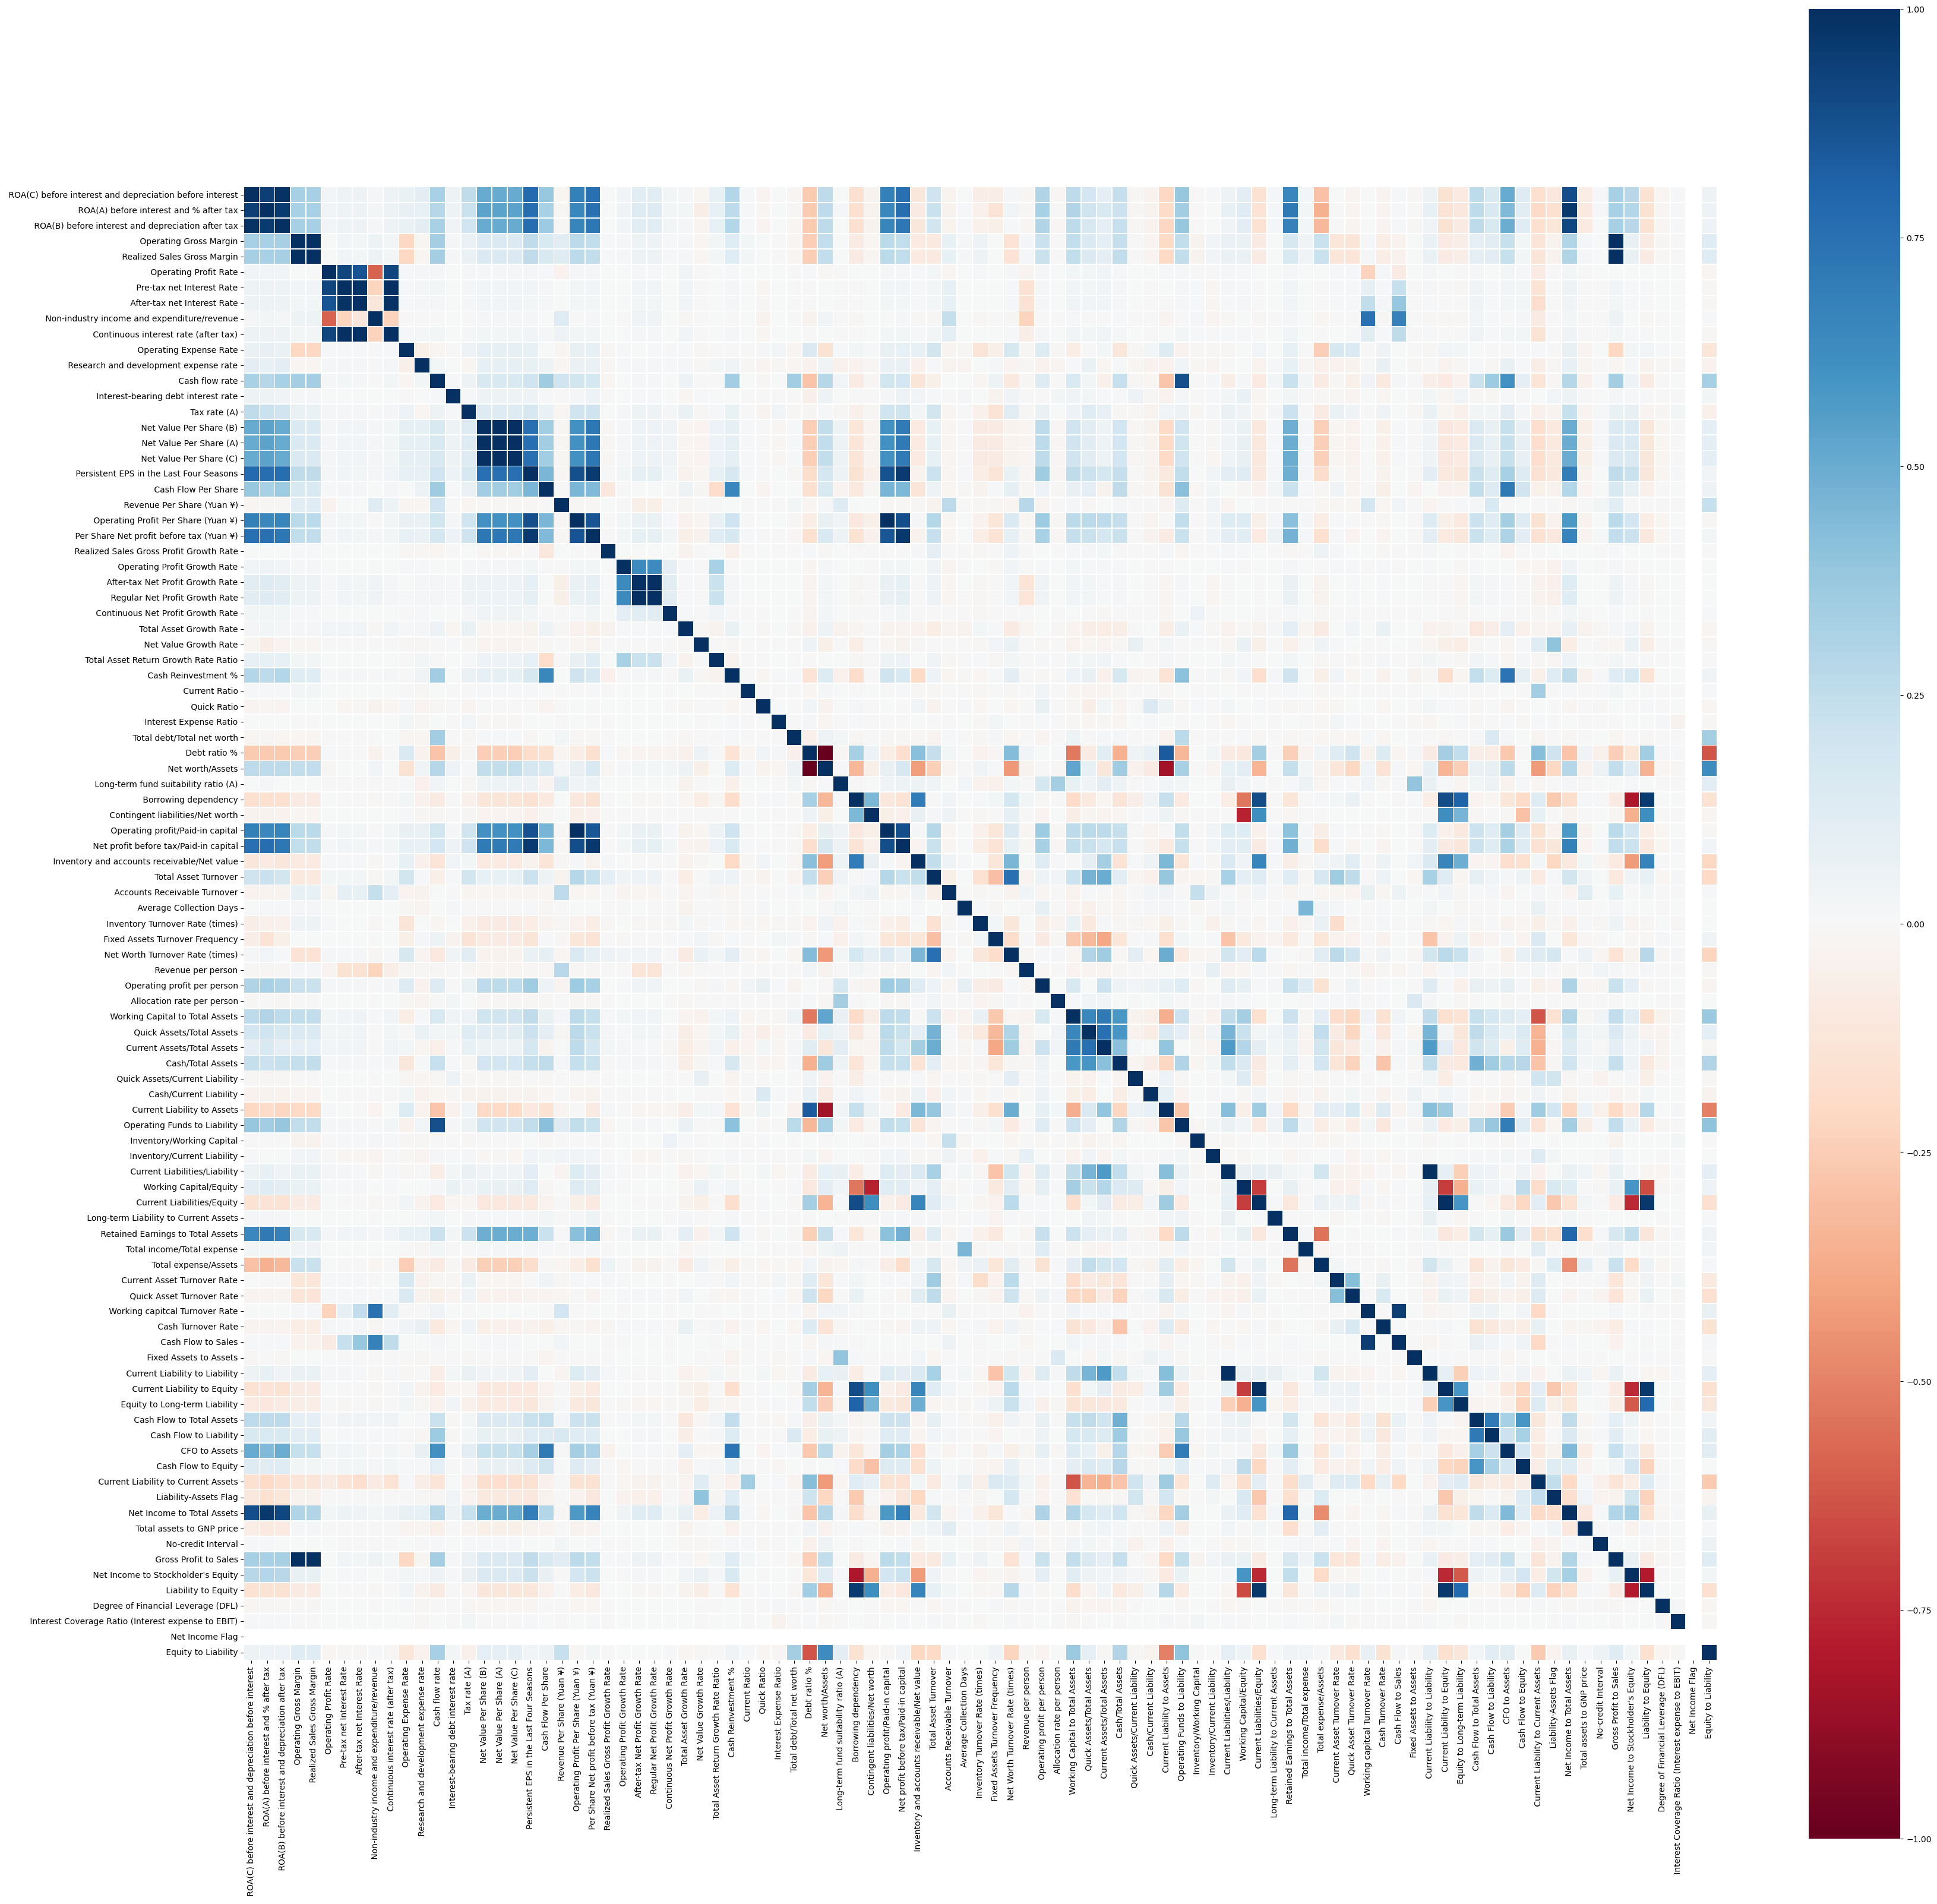

In [11]:
# Correlations
plt.figure(figsize=(40,40))
sns.heatmap(x_train.corr(), linewidths=0.5, square = True, cmap = 'RdBu')
plt.show()

#### Training, Validation, and Test Sets

In [12]:
x_train_cv, x_validate, y_train_cv, y_validate = train_test_split(x_train, y_train, test_size = 0.2, train_size = 0.8)

#### Random Forest Classifier

In [ ]:
# Create Model 
rf_param = {'n_estimators' : [10, 50, 100, 250], 
            'max_features' : [10, 30, 60, 80, 95],
            'max_depth' : [10,50,100, None],
            'criterion' : ('entropy','gini')}
    
rfc = RandomizedSearchCV(RandomForestClassifier(), rf_param)

rfc.fit(x_train_cv, y_train_cv)

In [ ]:
# Training Set
print('Training Set\n')

# Y Train Pred
y_train_cv_pred = rfc.predict(x_train_cv)

# GridSearch Scores
print('GridSearch Results:')
print("Best parameters: {}".format(rfc.best_params_))
print("Best cross-validation score: {:.2f}".format(rfc.best_score_))
print("Best estimator:\n{}".format(rfc.best_estimator_))

# Model Results
fpr, tpr, thresholds = roc_curve(y_train_cv, y_train_cv_pred)
print('\nModel Prediction Results:')
print(f'Precision Score: {round(precision_score(y_train_cv, y_train_cv_pred), 3)}')
print(f'Recall Score: {round(recall_score(y_train_cv, y_train_cv_pred), 3)}')
print(f'FPR: {round(fpr[1],5)}')
print(f'TPR: {round(tpr[1],5)}')
print(f'F1-Score: {round(f1_score(y_train_cv, y_train_cv_pred),3)}')

# Confusion Matrix
matrix = confusion_matrix(y_train_cv_pred, y_train_cv)
print('\nConfusion Matrix')
display(matrix)

# Curves

# Precision Recall
print('\nPrecision Recall Curve:')
precision, recall, threshhold = precision_recall_curve(y_train_cv, y_train_cv_pred)
curve = PrecisionRecallDisplay(precision=precision, recall=recall)
curve.plot()
plt.show()

# ROC Curve
print('ROC Curve:')
fpr, tpr, thresholds = roc_curve(y_train_cv, y_train_cv_pred)
curve = RocCurveDisplay(fpr=fpr, tpr=tpr)
curve.plot()
plt.show()

In [ ]:
# Validation Set
print('Validation Set')

# Y Train Pred
y_validate_pred = rfc.predict(x_validate)

# Model Results
fpr, tpr, thresholds = roc_curve(y_validate_pred, y_validate)
print('\nModel Prediction Results:')
print(f'Precision Score: {round(precision_score(y_validate, y_validate_pred), 3)}')
print(f'Recall Score: {round(recall_score(y_validate, y_validate_pred), 3)}')
print(f'FPR: {round(fpr[1],5)}')
print(f'TPR: {round(tpr[1],5)}')
print(f'F1-Score: {round(f1_score(y_validate, y_validate_pred),3)}')

# Confusion Matrix
matrix = confusion_matrix(y_validate_pred, y_validate)
print('\nConfusion Matrix')
display(matrix)

# Curves

# Precision Recall
print('\nPrecision Recall Curve:')
precision, recall, threshhold = precision_recall_curve(y_validate, y_validate_pred)
curve = PrecisionRecallDisplay(precision=precision, recall=recall)
curve.plot()
plt.show()

# ROC Curve
print('ROC Curve:')
fpr, tpr, thresholds = roc_curve(y_validate, y_validate_pred)
curve = RocCurveDisplay(fpr=fpr, tpr=tpr)
curve.plot()
plt.show()

#### Gradient Boosted Trees

In [ ]:
gbtc_param = {'n_estimators' : [10, 50, 100, 250], 
            'max_features' : [10, 30, 60, 80, 96], 
            'max_depth' : [10,50,100, None]}
    
gbtc = GridSearchCV(GradientBoostingClassifier(), gbtc_param)

gbtc.fit(x_train_cv, y_train_cv)

In [ ]:
# Training Set
print('Training Set\n')

# Y Train Pred
y_train_cv_pred = gbtc.predict(x_train_cv)

# GridSearch Scores
print('GridSearch Results:')
print("Best parameters: {}".format(gbtc.best_params_))
print("Best cross-validation score: {:.2f}".format(gbtc.best_score_))
print("Best estimator:\n{}".format(gbtc.best_estimator_))

# Model Results
fpr, tpr, thresholds = roc_curve(y_train_cv, y_train_cv_pred)
print('\nModel Prediction Results:')
print(f'Precision Score: {round(precision_score(y_train_cv, y_train_cv_pred), 3)}')
print(f'Recall Score: {round(recall_score(y_train_cv, y_train_cv_pred), 3)}')
print(f'FPR: {round(fpr[1],5)}')
print(f'TPR: {round(tpr[1],5)}')
print(f'F1-Score: {round(f1_score(y_train_cv, y_train_cv_pred),3)}')

# Confusion Matrix
matrix = confusion_matrix(y_train_cv_pred, y_train_cv)
print('\nConfusion Matrix')
display(matrix)

# Curves

# Precision Recall
print('\nPrecision Recall Curve:')
precision, recall, threshhold = precision_recall_curve(y_train_cv, y_train_cv_pred)
curve = PrecisionRecallDisplay(precision=precision, recall=recall)
curve.plot()
plt.show()

# ROC Curve
print('ROC Curve:')
fpr, tpr, thresholds = roc_curve(y_train_cv, y_train_cv_pred)
curve = RocCurveDisplay(fpr=fpr, tpr=tpr)
curve.plot()
plt.show()

In [ ]:
# Validation Set
print('Validation Set')

# Y Train Pred
y_validate_pred = gbtc.predict(x_validate)

# Model Results
fpr, tpr, thresholds = roc_curve(y_validate_pred, y_validate)
print('\nModel Prediction Results:')
print(f'Precision Score: {round(precision_score(y_validate, y_validate_pred), 3)}')
print(f'Recall Score: {round(recall_score(y_validate, y_validate_pred), 3)}')
print(f'FPR: {round(fpr[1],5)}')
print(f'TPR: {round(tpr[1],5)}')
print(f'F1-Score: {round(f1_score(y_validate, y_validate_pred),3)}')

# Confusion Matrix
matrix = confusion_matrix(y_validate_pred, y_validate)
print('\nConfusion Matrix')
display(matrix)

# Curves

# Precision Recall
print('\nPrecision Recall Curve:')
precision, recall, threshhold = precision_recall_curve(y_validate, y_validate_pred)
curve = PrecisionRecallDisplay(precision=precision, recall=recall)
curve.plot()
plt.show()

# ROC Curve
print('ROC Curve:')
fpr, tpr, thresholds = roc_curve(y_validate, y_validate_pred)
curve = RocCurveDisplay(fpr=fpr, tpr=tpr)
curve.plot()
plt.show()

#### Extra Trees

In [ ]:
etc_param = {'n_estimators' : [10, 50, 100, 250], 
            'max_features' : [10, 30, 60, 80, 96], 
            'max_depth' : [10,50,100, None], 
            'criterion' : ('entropy','gini')}
    
etc = GridSearchCV(ExtraTreesClassifier(), etc_param)

etc.fit(x_train_cv, y_train_cv)

In [ ]:
# Training Set
print('Training Set\n')

# Y Train Pred
y_train_cv_pred = etc.predict(x_train_cv)

# GridSearch Scores
print('GridSearch Results:')
print("Best parameters: {}".format(etc.best_params_))
print("Best cross-validation score: {:.2f}".format(etc.best_score_))
print("Best estimator:\n{}".format(etc.best_estimator_))

# Model Results
fpr, tpr, thresholds = roc_curve(y_train_cv, y_train_cv_pred)
print('\nModel Prediction Results:')
print(f'Precision Score: {round(precision_score(y_train_cv, y_train_cv_pred), 3)}')
print(f'Recall Score: {round(recall_score(y_train_cv, y_train_cv_pred), 3)}')
print(f'FPR: {round(fpr[1],5)}')
print(f'TPR: {round(tpr[1],5)}')
print(f'F1-Score: {round(f1_score(y_train_cv, y_train_cv_pred),3)}')

# Confusion Matrix
matrix = confusion_matrix(y_train_cv_pred, y_train_cv)
print('\nConfusion Matrix')
display(matrix)

# Curves

# Precision Recall
print('\nPrecision Recall Curve:')
precision, recall, threshhold = precision_recall_curve(y_train_cv, y_train_cv_pred)
curve = PrecisionRecallDisplay(precision=precision, recall=recall)
curve.plot()
plt.show()

# ROC Curve
print('ROC Curve:')
fpr, tpr, thresholds = roc_curve(y_train_cv, y_train_cv_pred)
curve = RocCurveDisplay(fpr=fpr, tpr=tpr)
curve.plot()
plt.show()

In [ ]:
# Validation Set
print('Validation Set')

# Y Train Pred
y_validate_pred = etc.predict(x_validate)

# Model Results
fpr, tpr, thresholds = roc_curve(y_validate_pred, y_validate)
print('\nModel Prediction Results:')
print(f'Precision Score: {round(precision_score(y_validate, y_validate_pred), 3)}')
print(f'Recall Score: {round(recall_score(y_validate, y_validate_pred), 3)}')
print(f'FPR: {round(fpr[1],5)}')
print(f'TPR: {round(tpr[1],5)}')
print(f'F1-Score: {round(f1_score(y_validate, y_validate_pred),3)}')

# Confusion Matrix
matrix = confusion_matrix(y_validate_pred, y_validate)
print('\nConfusion Matrix')
display(matrix)

# Curves

# Precision Recall
print('\nPrecision Recall Curve:')
precision, recall, threshhold = precision_recall_curve(y_validate, y_validate_pred)
curve = PrecisionRecallDisplay(precision=precision, recall=recall)
curve.plot()
plt.show()

# ROC Curve
print('ROC Curve:')
fpr, tpr, thresholds = roc_curve(y_validate, y_validate_pred)
curve = RocCurveDisplay(fpr=fpr, tpr=tpr)
curve.plot()
plt.show()